In [213]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import networkx as nx
import itertools

In [214]:
RESULTPATH = '/results/shapley/'
os.getcwd()
DATAPATH = '/home/pkeyl/Projekte/Shapley/data/Synthetic/dyn-BF/'
file = pd.read_csv(DATAPATH + 'refNetwork.csv')
def str2num(string):
    num = string[1:]
    return int(num)


file['Gene2'] = file['Gene2'].apply(str2num)
file['Gene1'] = file['Gene1'].apply(str2num)
genes = np.unique(np.array(file['Gene2'], file['Gene1']))
genedict = {gene:i for i,gene in enumerate(genes)}
def gene2num(gene):
    return genedict[gene]

file['Gene2'] = file['Gene2'].apply(gene2num)
file['Gene1'] = file['Gene1'].apply(gene2num)

true_edge_list = [(file['Gene2'][i], file['Gene1'][i]) for i in range(len(file))]
true_graph = nx.from_edgelist(true_edge_list).to_undirected()
l= nx.spring_layout(true_graph)

file

,Gene2,Gene1,Type
0,2,1,+
1,6,3,-
2,0,3,-
3,0,4,-
4,4,4,+
5,4,2,+
6,4,3,-
7,5,3,+
8,3,2,+
9,3,3,+


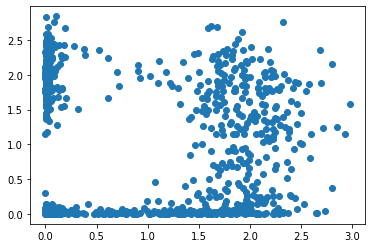

In [215]:
raw_data = np.array(pd.read_csv(DATAPATH + 'ExpressionData.csv').iloc[:,1:]).transpose()
raw_data.shape
plt.scatter(raw_data[:,2], raw_data[:,4])

In [216]:
#ground truth graph


In [217]:
filenames = os.listdir(os.getcwd() + RESULTPATH)

def load_file(filename):
    file_data = pd.read_csv(os.getcwd() + RESULTPATH + filename)

    return file_data
data = pd.concat([load_file(filename) for filename in filenames])
data['target'] = data['target'].astype(int)
print(data)


   target  source   shapley
0       3       4  1.019195
0       5       4  1.048259
0       3       1  0.990768
0       4       1  1.014192
0       6       0  1.023131
0       4       5  1.027178
0       2       5  1.004075
0       0       3  1.040793
0       2       6  1.006110
0       6       2  1.001046
0       0       4  1.100948
0       0       1  1.092050
0       4       6  1.046174
0       5       2  0.992571
0       5       6  1.141393
0       3       5  1.073013
0       1       3  1.015973
0       6       3  1.062433
0       5       1  0.969512
0       1       0  1.077038
0       1       5  1.014578
0       4       3  1.021003
0       6       5  1.074040
0       6       4  1.046843
0       3       2  0.989038
0       0       2  0.985613
0       2       3  1.013158
0       2       1  1.036496
0       1       4  1.039207
0       1       2  1.016548
0       0       5  1.033355
0       3       6  1.058221
0       2       0  1.024395
0       5       0  1.017495
0       5       3  1

In [218]:
data_wide = pd.pivot_table(data, values = 'shapley', index='source',

                    columns='target')
#data_wide.values[[np.arange(data_wide.shape[0])]*2] = 0
#data_wide.values[[np.arange(13)]*2] = 0


<AxesSubplot:xlabel='target', ylabel='source'>

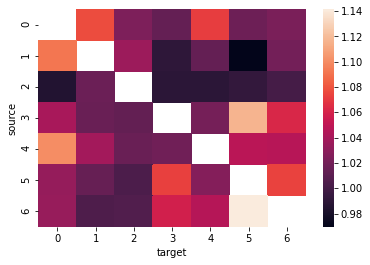

In [219]:
#sns.heatmap((data_wide>=0.001)*1.0)
sns.heatmap(data_wide)

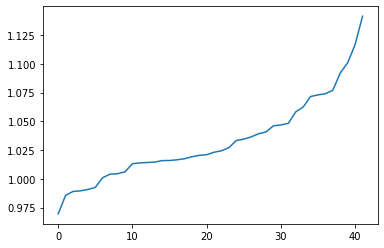

In [220]:
#todo: ROC
a = np.array(data['shapley']).ravel()
a.sort()
plt.plot(a)

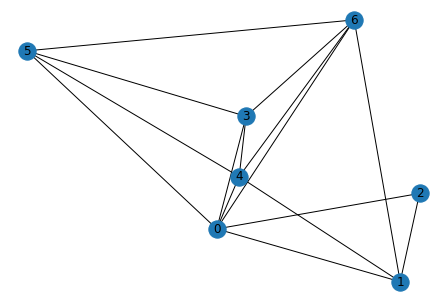

In [227]:
import networkx as nx
#adj = 0.5 * (np.array(data_wide)+ np.array(data_wide).transpose())
adj = np.maximum(np.array(data_wide), np.array(data_wide).transpose())

threshold = 1.02 # 0.1*np.median(data['shapley'])
Graph = nx.from_numpy_matrix(adj> threshold).to_undirected()
nx.draw(Graph, with_labels=True, pos = l)
#print(np.median(data['shapley']))


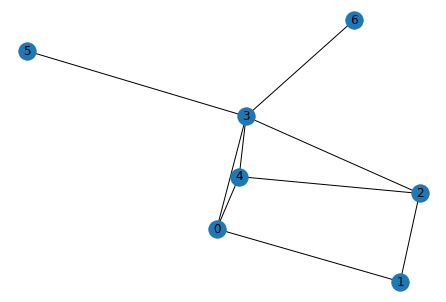

In [228]:
nx.draw(true_graph, with_labels=True, pos=l)


In [229]:
#find triangles with networkx
import itertools
all_cliques= nx.enumerate_all_cliques(Graph)
triad_cliques=[x for x in all_cliques if len(x)==3 ]
a = triad_cliques[0]

def get_edges(triad_clique):
    duo_list = list(itertools.product(triad_clique, triad_clique))
    end_list = [a for a in duo_list if a[0]!= a[1]]
    return end_list

b = [get_edges(a) for a in triad_cliques]
edges =[item for sublist in b for item in sublist]
edges

[(0, 1),
 (0, 2),
 (1, 0),
 (1, 2),
 (2, 0),
 (2, 1),
 (0, 1),
 (0, 4),
 (1, 0),
 (1, 4),
 (4, 0),
 (4, 1),
 (0, 1),
 (0, 6),
 (1, 0),
 (1, 6),
 (6, 0),
 (6, 1),
 (0, 3),
 (0, 4),
 (3, 0),
 (3, 4),
 (4, 0),
 (4, 3),
 (0, 3),
 (0, 5),
 (3, 0),
 (3, 5),
 (5, 0),
 (5, 3),
 (0, 3),
 (0, 6),
 (3, 0),
 (3, 6),
 (6, 0),
 (6, 3),
 (0, 4),
 (0, 5),
 (4, 0),
 (4, 5),
 (5, 0),
 (5, 4),
 (0, 4),
 (0, 6),
 (4, 0),
 (4, 6),
 (6, 0),
 (6, 4),
 (0, 5),
 (0, 6),
 (5, 0),
 (5, 6),
 (6, 0),
 (6, 5),
 (1, 4),
 (1, 6),
 (4, 1),
 (4, 6),
 (6, 1),
 (6, 4),
 (3, 4),
 (3, 5),
 (4, 3),
 (4, 5),
 (5, 3),
 (5, 4),
 (3, 4),
 (3, 6),
 (4, 3),
 (4, 6),
 (6, 3),
 (6, 4),
 (3, 5),
 (3, 6),
 (5, 3),
 (5, 6),
 (6, 3),
 (6, 5),
 (4, 5),
 (4, 6),
 (5, 4),
 (5, 6),
 (6, 4),
 (6, 5)]

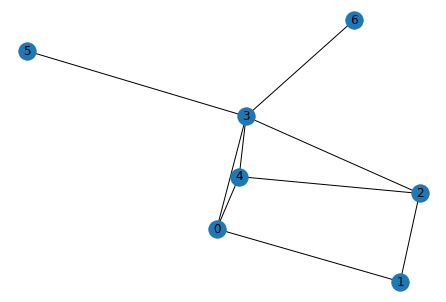

In [230]:
nx.draw(true_graph, with_labels=True, pos = l)

In [231]:
filenames = os.listdir(os.getcwd() + '/results/triangle/')

def load_file(filename):
    file_data = pd.read_csv(os.getcwd() + '/results/triangle/' + filename)
    return file_data
cond_data = pd.concat([load_file(filename) for filename in filenames])
print(cond_data)
cond_data['source'] = cond_data['p'].astype(int)
cond_data['masked_protein'] = cond_data['q'].astype(int)
cond_data['conditional'] = cond_data['conditional'].astype(int)



   p  q  conditional   shapley
0  0  5            6  0.017186
0  6  4            5  0.024012
0  5  3            4  0.193030
0  4  3            5  0.037020
0  0  4            5  0.176598
0  6  3            4  0.170292
0  6  3            5  0.039162
0  6  0            1  0.037187
0  5  6            3  0.089865
0  3  5            4  0.207076
0  3  4            6  0.011716
0  3  4            0  0.159620


[(0, 5), (6, 4), (5, 3), (4, 3), (0, 4), (6, 3), (6, 3), (6, 0), (5, 6), (3, 5), (3, 4), (3, 4)]


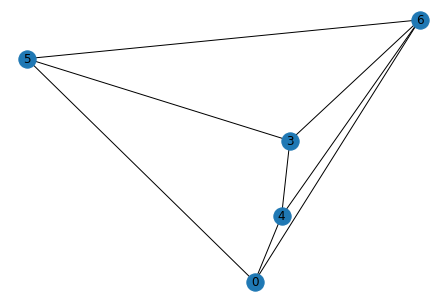

In [232]:
sources = cond_data['source'].max()
#edge_list = #{i:{cond_data['source'].iloc[i]: cond_data['masked_protein'].iloc[i]} for i in range(sources)}

cond_data2 = cond_data[cond_data['shapley']>0.0001]
edge_list = (list(zip(list(cond_data2['source']),list(cond_data2['masked_protein']))))
print(edge_list)
cond_graph = nx.from_edgelist(edge_list)
nx.draw(cond_graph, with_labels=True, pos = l)

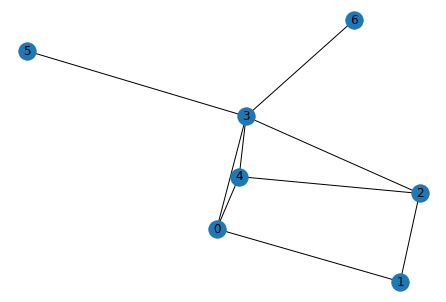

In [233]:
nx.draw(true_graph, with_labels=True, pos=l)

/home/pkeyl/.local/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


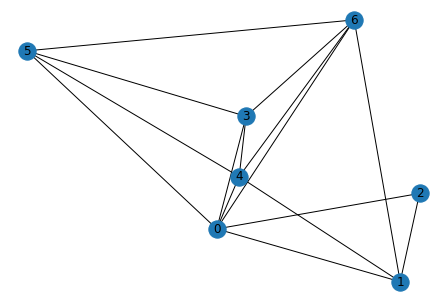

In [234]:
def get_triplets(triad_clique):
    raw_triplets = list(itertools.product(triad_clique, triad_clique, triad_clique))
    triplet_list = [raw_triplet for raw_triplet in raw_triplets if len(set(raw_triplet))==len(raw_triplet)]
    return triplet_list

triplets = [get_triplets(triad_clique) for triad_clique in triad_cliques]

def get_data(triplet):
    data = cond_data.loc[(cond_data['masked_protein']== triplet[0]) & (cond_data['source']== triplet[1]) & 
                   (cond_data['conditional']== triplet[2])]
    return data

cond_values = pd.concat([get_data(triplet) for sublist in triplets for triplet in sublist])
#print(cond_values)
cond_values_dir = cond_values.loc[cond_values['masked_protein']> cond_values['source']]
cond_values_trans = cond_values.loc[cond_values['masked_protein']< cond_values['source']]
cond_values_trans.rename(columns= {'masked_protein':'source', 'source': 'masked_protein'}, inplace = True)

merged_values = pd.merge(cond_values_dir, cond_values_trans, on = ('masked_protein', 'source', 'conditional'))
merged_values['shapley'] = 0.5 * (merged_values['shapley_x'] + merged_values['shapley_y'])
#merged_values['shapley'] = merged_values.loc[:,('shapley_x','shapley_y')].max(axis=1)
del_edges = merged_values[merged_values['shapley']<0.01]

corrected_graph = Graph.copy()

for i in range(del_edges.shape[0]):
    print(del_edges.iloc[i]['masked_protein'], del_edges.iloc[i]['source'])
    try:
        corrected_graph.remove_edge(del_edges.iloc[i]['source'], del_edges.iloc[i]['masked_protein'])
    except:
        print('edge not existent')
nx.draw(corrected_graph, with_labels=True, pos = l)

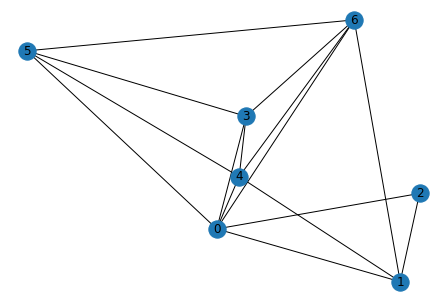

In [235]:
nx.draw(Graph, with_labels=True, pos = l)

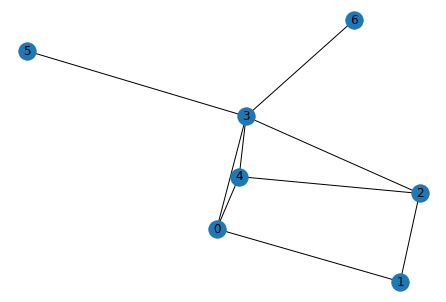

In [236]:
nx.draw(true_graph, with_labels=True, pos=l)

In [71]:
from sklearn.tree.tree import BaseDecisionTree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from numpy import *
import time
from operator import itemgetter
from multiprocessing import Pool


def compute_feature_importances(estimator):
    if isinstance(estimator, BaseDecisionTree):
        return estimator.tree_.compute_feature_importances(normalize=False)
    else:
        importances = [e.tree_.compute_feature_importances(normalize=False)
                       for e in estimator.estimators_]
        importances = asarray(importances)
        return sum(importances,axis=0) / len(estimator)
        


def get_link_list(VIM,gene_names=None,regulators='all',maxcount='all',file_name=None):
    
    """Gets the ranked list of (directed) regulatory links.
    
    Parameters
    ----------
    
    VIM: numpy array
        Array as returned by the function GENIE3(), in which the element (i,j) is the score of the edge directed from the i-th gene to the j-th gene. 
        
    gene_names: list of strings, optional
        List of length p, where p is the number of rows/columns in VIM, containing the names of the genes. The i-th item of gene_names must correspond to the i-th row/column of VIM. When the gene names are not provided, the i-th gene is named Gi.
        default: None
        
    regulators: list of strings, optional
        List containing the names of the candidate regulators. When a list of regulators is provided, the names of all the genes must be provided (in gene_names), and the returned list contains only edges directed from the candidate regulators. When regulators is set to 'all', any gene can be a candidate regulator.
        default: 'all'
        
    maxcount: 'all' or positive integer, optional
        Writes only the first maxcount regulatory links of the ranked list. When maxcount is set to 'all', all the regulatory links are written.
        default: 'all'
        
    file_name: string, optional
        Writes the ranked list of regulatory links to the file file_name.
        default: None
        
        
    
    Returns
    -------
    
    The list of regulatory links, ordered according to the edge score. Auto-regulations do not appear in the list. Regulatory links with a score equal to zero are randomly permuted. In the ranked list of edges, each line has format:
        
        regulator   target gene     score of edge
    """
    
    # Check input arguments      
    if not isinstance(VIM,ndarray):
        raise ValueError('VIM must be a square array')
    elif VIM.shape[0] != VIM.shape[1]:
        raise ValueError('VIM must be a square array')
        
    ngenes = VIM.shape[0]
        
    if gene_names is not None:
        if not isinstance(gene_names,(list,tuple)):
            raise ValueError('input argument gene_names must be a list of gene names')
        elif len(gene_names) != ngenes:
            raise ValueError('input argument gene_names must be a list of length p, where p is the number of columns/genes in the expression data')
        
    if regulators is not 'all':
        if not isinstance(regulators,(list,tuple)):
            raise ValueError('input argument regulators must be a list of gene names')

        if gene_names is None:
            raise ValueError('the gene names must be specified (in input argument gene_names)')
        else:
            sIntersection = set(gene_names).intersection(set(regulators))
            if not sIntersection:
                raise ValueError('The genes must contain at least one candidate regulator')
        
    if maxcount is not 'all' and not isinstance(maxcount,int):
        raise ValueError('input argument maxcount must be "all" or a positive integer')
        
    if file_name is not None and not isinstance(file_name,str):
        raise ValueError('input argument file_name must be a string')
    
    

    # Get the indices of the candidate regulators
    if regulators == 'all':
        input_idx = range(ngenes)
    else:
        input_idx = [i for i, gene in enumerate(gene_names) if gene in regulators]
    
    # Get the non-ranked list of regulatory links
    vInter = [(i,j,score) for (i,j),score in ndenumerate(VIM) if i in input_idx and i!=j]
    
    # Rank the list according to the weights of the edges        
    vInter_sort = sorted(vInter,key=itemgetter(2),reverse=True)
    nInter = len(vInter_sort)
    
    # Random permutation of edges with score equal to 0
    flag = 1
    i = 0
    while flag and i < nInter:
        (TF_idx,target_idx,score) = vInter_sort[i]
        if score == 0:
            flag = 0
        else:
            i += 1
            
    if not flag:
        items_perm = vInter_sort[i:]
        items_perm = random.permutation(items_perm)
        vInter_sort[i:] = items_perm
        
    # Write the ranked list of edges
    nToWrite = nInter
    if isinstance(maxcount,int) and maxcount >= 0 and maxcount < nInter:
        nToWrite = maxcount
        
    if file_name:
    
        outfile = open(file_name,'w')
    
        if gene_names is not None:
            for i in range(nToWrite):
                (TF_idx,target_idx,score) = vInter_sort[i]
                TF_idx = int(TF_idx)
                target_idx = int(target_idx)
                outfile.write('%s\t%s\t%.6f\n' % (gene_names[TF_idx],gene_names[target_idx],score))
        else:
            for i in range(nToWrite):
                (TF_idx,target_idx,score) = vInter_sort[i]
                TF_idx = int(TF_idx)
                target_idx = int(target_idx)
                outfile.write('G%d\tG%d\t%.6f\n' % (TF_idx+1,target_idx+1,score))
            
        
        outfile.close()
        
    else:
        
        if gene_names is not None:
            for i in range(nToWrite):
                (TF_idx,target_idx,score) = vInter_sort[i]
                TF_idx = int(TF_idx)
                target_idx = int(target_idx)
                print('%s\t%s\t%.6f' % (gene_names[TF_idx],gene_names[target_idx],score))
        else:
            for i in range(nToWrite):
                (TF_idx,target_idx,score) = vInter_sort[i]
                TF_idx = int(TF_idx)
                target_idx = int(target_idx)
                print('G%d\tG%d\t%.6f' % (TF_idx+1,target_idx+1,score))
                
                
                



def GENIE3(expr_data,gene_names=None,regulators='all',tree_method='RF',K='sqrt',ntrees=1000,nthreads=1):
    
    '''Computation of tree-based scores for all putative regulatory links.
    
    Parameters
    ----------
    
    expr_data: numpy array
        Array containing gene expression values. Each row corresponds to a condition and each column corresponds to a gene.
        
    gene_names: list of strings, optional
        List of length p, where p is the number of columns in expr_data, containing the names of the genes. The i-th item of gene_names must correspond to the i-th column of expr_data.
        default: None
        
    regulators: list of strings, optional
        List containing the names of the candidate regulators. When a list of regulators is provided, the names of all the genes must be provided (in gene_names). When regulators is set to 'all', any gene can be a candidate regulator.
        default: 'all'
        
    tree-method: 'RF' or 'ET', optional
        Specifies which tree-based procedure is used: either Random Forest ('RF') or Extra-Trees ('ET')
        default: 'RF'
        
    K: 'sqrt', 'all' or a positive integer, optional
        Specifies the number of selected attributes at each node of one tree: either the square root of the number of candidate regulators ('sqrt'), the total number of candidate regulators ('all'), or any positive integer.
        default: 'sqrt'
         
    ntrees: positive integer, optional
        Specifies the number of trees grown in an ensemble.
        default: 1000
    
    nthreads: positive integer, optional
        Number of threads used for parallel computing
        default: 1
        
        
    Returns
    -------
    An array in which the element (i,j) is the score of the edge directed from the i-th gene to the j-th gene. All diagonal elements are set to zero (auto-regulations are not considered). When a list of candidate regulators is provided, the scores of all the edges directed from a gene that is not a candidate regulator are set to zero.
        
    '''
    
    time_start = time.time()
    
    # Check input arguments
    if not isinstance(expr_data,ndarray):
        raise ValueError('expr_data must be an array in which each row corresponds to a condition/sample and each column corresponds to a gene')
        
    ngenes = expr_data.shape[1]
    
    if gene_names is not None:
        if not isinstance(gene_names,(list,tuple)):
            raise ValueError('input argument gene_names must be a list of gene names')
        elif len(gene_names) != ngenes:
            raise ValueError('input argument gene_names must be a list of length p, where p is the number of columns/genes in the expr_data')
        
    if regulators is not 'all':
        if not isinstance(regulators,(list,tuple)):
            raise ValueError('input argument regulators must be a list of gene names')

        if gene_names is None:
            raise ValueError('the gene names must be specified (in input argument gene_names)')
        else:
            sIntersection = set(gene_names).intersection(set(regulators))
            if not sIntersection:
                raise ValueError('the genes must contain at least one candidate regulator')        
        
    if tree_method is not 'RF' and tree_method is not 'ET':
        raise ValueError('input argument tree_method must be "RF" (Random Forests) or "ET" (Extra-Trees)')
        
    if K is not 'sqrt' and K is not 'all' and not isinstance(K,int): 
        raise ValueError('input argument K must be "sqrt", "all" or a stricly positive integer')
        
    if isinstance(K,int) and K <= 0:
        raise ValueError('input argument K must be "sqrt", "all" or a stricly positive integer')
    
    if not isinstance(ntrees,int):
        raise ValueError('input argument ntrees must be a stricly positive integer')
    elif ntrees <= 0:
        raise ValueError('input argument ntrees must be a stricly positive integer')
        
    if not isinstance(nthreads,int):
        raise ValueError('input argument nthreads must be a stricly positive integer')
    elif nthreads <= 0:
        raise ValueError('input argument nthreads must be a stricly positive integer')
        
        
    print('Tree method: ' + str(tree_method))
    print('K: ' + str(K))
    print('Number of trees: ' + str(ntrees))
    print('\n')
        
    
    # Get the indices of the candidate regulators
    if regulators == 'all':
        input_idx = list(range(ngenes))
    else:
        input_idx = [i for i, gene in enumerate(gene_names) if gene in regulators]

    
    # Learn an ensemble of trees for each target gene, and compute scores for candidate regulators
    VIM = zeros((ngenes,ngenes))
    
    if nthreads > 1:
        print('running jobs on %d threads' % nthreads)

        input_data = list()
        for i in range(ngenes):
            input_data.append( [expr_data,i,input_idx,tree_method,K,ntrees] )

        pool = Pool(nthreads)
        alloutput = pool.map(wr_GENIE3_single, input_data)
    
        for (i,vi) in alloutput:
            VIM[i,:] = vi

    else:
        print('running single threaded jobs')
        for i in range(ngenes):
            print('Gene %d/%d...' % (i+1,ngenes))
            
            vi = GENIE3_single(expr_data,i,input_idx,tree_method,K,ntrees)
            VIM[i,:] = vi

   
    VIM = transpose(VIM)
 
    time_end = time.time()
    print("Elapsed time: %.2f seconds" % (time_end - time_start))

    return VIM
    
    
    
def wr_GENIE3_single(args):
    return([args[1], GENIE3_single(args[0], args[1], args[2], args[3], args[4], args[5])])
    


def GENIE3_single(expr_data,output_idx,input_idx,tree_method,K,ntrees):
    
    ngenes = expr_data.shape[1]
    
    # Expression of target gene
    output = expr_data[:,output_idx]
    
    # Normalize output data
    output = output / std(output)
    
    # Remove target gene from candidate regulators
    input_idx = input_idx[:]
    if output_idx in input_idx:
        input_idx.remove(output_idx)

    expr_data_input = expr_data[:,input_idx]
    
    # Parameter K of the tree-based method
    if (K == 'all') or (isinstance(K,int) and K >= len(input_idx)):
        max_features = "auto"
    else:
        max_features = K
    
    if tree_method == 'RF':
        treeEstimator = RandomForestRegressor(n_estimators=ntrees,max_features=max_features)
    elif tree_method == 'ET':
        treeEstimator = ExtraTreesRegressor(n_estimators=ntrees,max_features=max_features)

    # Learn ensemble of trees
    treeEstimator.fit(expr_data_input,output)
    
    # Compute importance scores
    feature_importances = compute_feature_importances(treeEstimator)
    vi = zeros(ngenes)
    vi[input_idx] = feature_importances
       
    return vi
        
        
        

In [72]:
data = pd.read_csv(DATAPATH + "ExpressionData.csv")
expression_data = np.array(data.iloc[:,1:]).transpose()
expression_data.shape

(1000, 7)

In [73]:
results = GENIE3(expression_data)

Tree method: RF
K: sqrt
Number of trees: 1000


running single threaded jobs
Gene 1/7...
Gene 2/7...
Gene 3/7...
Gene 4/7...
Gene 5/7...
Gene 6/7...
Gene 7/7...
Elapsed time: 14.83 seconds


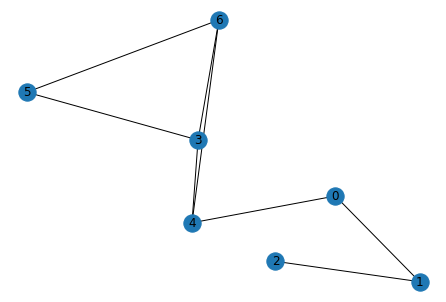

In [74]:
adj = 0.5 * (np.array(results)+ np.array(results).transpose())
Genie = nx.from_numpy_matrix(adj>0.15).to_undirected()
nx.draw(Genie, with_labels=True, pos = l)

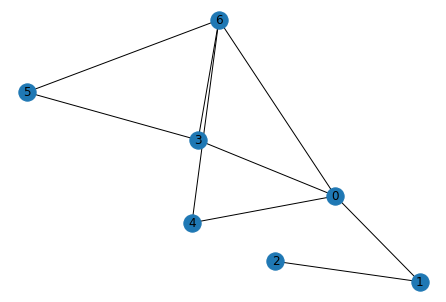

In [75]:
nx.draw(corrected_graph, with_labels=True, pos = l)

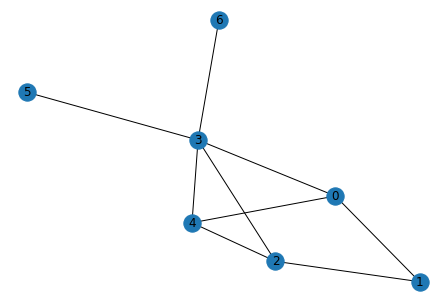

In [76]:
nx.draw(true_graph, with_labels=True, pos=l)

In [49]:
#chi square  test

In [50]:
adj_shapley = np.array(nx.adjacency_matrix(corrected_graph).todense()).ravel()
adj_true = np.array(nx.adjacency_matrix(true_graph).todense()).ravel()
adj_genie = np.array(nx.adjacency_matrix(Genie).todense()).ravel()
adj_shapley.shape

(49,)

In [51]:
from sklearn.metrics import roc_curve as roc
from scipy.stats import chi2_contingency as chi2
from scipy.stats import chisquare

In [52]:
def calc_freq(true, pre):
    A = ( (true==True) & (pre == True) & (true==pre)).sum()
    B = ( (true==False) & (pre == True) & (true!=pre)).sum()
    C = ( (true==False) & (pre == False) & (true==pre)).sum()
    D = ( (true==True) & (pre == False) & (true!=pre)).sum()
    return [[A,B],[C,D]]

freqs = calc_freq(adj_true, adj_shapley)

In [55]:
chisquare(*calc_freq(adj_true, adj_shapley))

Power_divergenceResult(statistic=9.380952380952381, pvalue=0.0021925161542251546)

In [56]:
chisquare(*calc_freq(adj_true, adj_genie))

Power_divergenceResult(statistic=6.161904761904762, pvalue=0.013053057345139509)

In [34]:
freqs

[[14, 10], [19, 6]]

In [35]:
calc_freq(adj_true, adj_genie)

[[8, 8], [21, 12]]